In [1]:
import torch
from IPython import display
import numpy as np
import random

In [2]:
# config
input_size = 10
example_size = 5000
w_vector = [114.0,514.0,114.,514.,114.,514.,114.,514.,114.,514.] # (10)
b_vector = 520.1314
sample_feature = torch.randn(example_size,input_size,dtype=float)# (5000,10)
sample_labels=0
for i in range(10):
    sample_labels+= w_vector[i]*sample_feature[:,i] # (5000)
sample_labels += b_vector
sample_labels += torch.tensor(np.random.normal(loc=0.0,scale=1,size=(example_size)),dtype=float)
print(sample_feature[0],sample_labels[0])



tensor([-0.7305, -1.1449, -1.6149, -1.0535,  0.6946,  0.1147, -0.1446, -0.8130,
         1.8295,  1.4848], dtype=torch.float64) tensor(-200.5531, dtype=torch.float64)


torch.Size([5000]) torch.Size([5000])



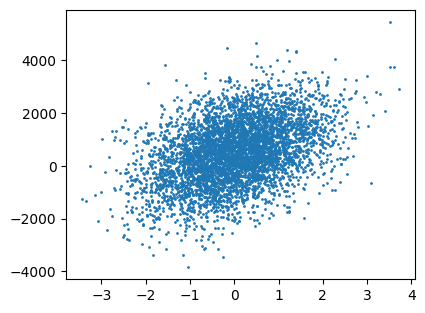

In [3]:
import matplotlib.pyplot as plt 
def display_with_svg():
    display.display_svg()
    return
def set_fig_size(figure_size=(4.5,3.5)):
    display_with_svg()
    plt.rcParams['figure.figsize']=figure_size

set_fig_size()
print(sample_feature[:,1].shape,sample_labels.shape)
print()
plt.scatter(sample_feature[:,1].numpy(),sample_labels.numpy(),1)




In [4]:
import random
def data_iter(batch_size,features,labels):
    size = len(features)
    indices = list(range(size))
    random.shuffle(indices)
    for i in range(0,size,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,size)])
        yield features.index_select(0,j),labels.index_select(0,j)
batch_size=100
for x,y in data_iter(batch_size,sample_feature,sample_labels):
    print(x)
    print()
    print(y)
    break




tensor([[-2.9106e-02, -1.4521e+00, -7.5765e-01, -6.1593e-01, -7.9294e-01,
          4.4973e-01, -4.3684e-01,  1.1143e+00, -5.9788e-02, -6.1502e-01],
        [ 6.5434e-01,  3.4256e-01, -3.2247e-01,  3.3272e-03, -6.1846e-01,
         -2.8484e-01,  1.3206e+00, -1.0677e-01,  1.0558e+00, -1.3365e+00],
        [-9.5920e-01, -1.4742e-01,  4.2435e-01,  1.6427e-01,  2.3751e-01,
         -3.5208e-02, -1.9275e-01,  2.3137e-01, -3.4018e-02,  4.8455e-01],
        [ 6.4064e-01, -2.0346e-01,  1.0787e-01, -2.3637e+00, -3.2236e-01,
         -5.1005e-03,  2.0710e-01,  5.4474e-01,  1.6137e-01, -3.4681e-02],
        [ 9.3137e-03,  7.8468e-01, -1.1137e+00, -1.5583e-01,  3.5381e-01,
         -1.7903e+00, -7.9596e-01,  1.6825e-01,  1.2047e+00, -6.3846e-01],
        [-1.4444e+00,  7.9069e-01, -5.0603e-01,  1.5503e+00, -5.7811e-01,
         -1.0793e+00, -1.3340e+00, -5.7209e-01, -1.9646e+00,  8.3999e-01],
        [-1.4191e+00,  7.5195e-01, -1.3391e+00, -7.9272e-01, -1.9536e+00,
         -1.7926e-01, -1.5113e+0

In [5]:
w = torch.tensor(np.random.normal(0, 0.01, (input_size, 1)), dtype=torch.float64,requires_grad=True)
b = torch.zeros(1, dtype=torch.float64,requires_grad=True)
def line_model(x,w,b):
    return torch.mm(x,w)+b
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size
lr = 0.03
num_epochs = 300
net = line_model
loss = squared_loss
for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, sample_feature, sample_labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        train_l = loss(net(sample_feature, w, b), sample_labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 764125.898864
epoch 1, loss 719953.225502
epoch 1, loss 669286.680208
epoch 1, loss 634876.137296
epoch 1, loss 592063.397694
epoch 1, loss 559614.743211
epoch 1, loss 524966.882026
epoch 1, loss 493735.442529
epoch 1, loss 465593.768838
epoch 1, loss 438702.505077
epoch 1, loss 421322.382676
epoch 1, loss 393563.530098
epoch 1, loss 376391.285156
epoch 1, loss 351325.466394
epoch 1, loss 330336.786457
epoch 1, loss 310355.948217
epoch 1, loss 289654.757178
epoch 1, loss 272008.419095
epoch 1, loss 256905.723159
epoch 1, loss 242022.761597
epoch 1, loss 228617.515361
epoch 1, loss 213832.818209
epoch 1, loss 203064.801286
epoch 1, loss 190112.284908
epoch 1, loss 179558.000391
epoch 1, loss 172210.382890
epoch 1, loss 163350.905530
epoch 1, loss 155158.043701
epoch 1, loss 146449.146395
epoch 1, loss 137643.351624
epoch 1, loss 130245.487608
epoch 1, loss 123269.613462
epoch 1, loss 117147.710840
epoch 1, loss 110167.601041
epoch 1, loss 104513.233262
epoch 1, loss 97555.

In [6]:
print(w_vector, '\n', w)
print(b_vector, '\n', b)

[114.0, 514.0, 114.0, 514.0, 114.0, 514.0, 114.0, 514.0, 114.0, 514.0] 
 tensor([[114.0523],
        [514.0117],
        [114.0041],
        [513.9988],
        [113.9925],
        [513.9996],
        [114.0247],
        [513.9839],
        [114.0052],
        [514.0028]], dtype=torch.float64, requires_grad=True)
520.1314 
 tensor([520.1419], dtype=torch.float64, requires_grad=True)
